In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.spatial import distance
import statsmodels.api as sm
import seaborn as sns
import matplotlib.patches as patches
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull
import matplotlib.lines as mlines
sns.set()

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Importar DF

In [5]:
#df1 = pd.read_csv(r"C:\Users\Paola Fajardo\Desktop\CienciaDatos\Proyecto Integrador\proyectointegrador\vector_pago_1.csv")
df1 = pd.read_csv(r"C:\Users\naujs\Google Drive\EAFIT2020\Semestre1\ProyInt\VECTOR_PAGO.CSV", delimiter ='¡', engine = "python")

In [6]:
df1.describe()

,CUCONUSE,VECTOR,SESUSERV,SESUSUSC,SESUCATE,SESUSUCA,SESUDEPA,SESULOCA,SESUCUSA,SESUSAPE,SESUSAAN,SESUCICL,SUSCNITC,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,SUMA,CANTIDAD,CALIFICACION_VECTOR_SERVICIO,CALIFICACION_VECTOR_CONTRATO,CALIFICACION_VECTOR_CLIENTE,DIA_PAGO_1,DIA_PAGO_2,DIA_PAGO_3,PERFIL_DIGITAL,PORTAFOLIO,SERVICIO_PRINCIPAL,GERENCIA_B2B,LINEA_ABOGADO,TRASLADO,NOMBRE_TRASLADO
count,3.660000e+02,3.660000e+02,366.000000,3.660000e+02,366.000000,366.000000,366.000000,366.000000,366.000000,336.000000,317.000000,366.000000,3.660000e+02,133.000000,331.000000,323.000000,316.000000,299.000000,285.000000,280.000000,278.000000,278.000000,279.000000,279.000000,279.000000,366.000000,366.000000,366.000000,366.000000,366.000000,293.000000,291.000000,290.000000,0.0,0.0,3.020000e+02,0.0,0.0,0.0,0.0
mean,6.595720e+07,3.342346e+11,2817.877049,4.745585e+06,1.139344,2.904372,206.133880,15097.513661,0.595628,34809.589286,11760.794953,5.398907,1.521784e+08,90.225564,77.567976,86.950464,88.734177,91.153846,91.438596,90.607143,91.834532,91.960432,90.860215,91.505376,91.505376,819.644809,9.180328,78.521858,76.775956,76.226776,16.627986,15.608247,14.782759,NaN,NaN,2.361869e+04,NaN,NaN,NaN,NaN
std,5.904548e+07,2.523821e+11,2235.084952,3.754627e+06,0.362236,2.341790,383.913319,26767.140829,0.702545,42816.716053,25507.443297,5.554157,3.243824e+08,26.797958,34.927076,20.908794,18.644006,14.180869,13.170092,13.026962,12.626885,12.782062,13.063700,12.732407,12.732407,414.111373,4.155240,30.509434,30.321728,26.788373,7.416764,7.136439,7.588763,NaN,NaN,1.535979e+05,NaN,NaN,NaN,NaN
min,1.184300e+04,1.000000e+00,1.000000,5.935100e+04,1.000000,-1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.316940e+05,0.000000,0.000000,0.000000,0.000000,50.000000,50.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,-1.000000e+00,NaN,NaN,NaN,NaN
25%,1.572453e+06,1.111111e+11,565.000000,1.178898e+06,1.000000,2.000000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.183522e+07,100.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,690.000000,10.000000,74.250000,67.000000,61.250000,14.000000,13.000000,11.000000,NaN,NaN,-1.000000e+00,NaN,NaN,NaN,NaN
50%,1.199580e+08,4.422889e+11,3905.000000,3.868538e+06,1.000000,3.000000,5.000000,212.000000,0.000000,32768.000000,0.000000,8.000000,4.206948e+07,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1000.000000,11.000000,91.000000,88.000000,85.000000,16.000000,16.000000,15.000000,NaN,NaN,-1.000000e+00,NaN,NaN,NaN,NaN
75%,1.199643e+08,5.121283e+11,3905.000000,8.289917e+06,1.000000,3.000000,66.000000,17001.000000,1.000000,55584.500000,0.000000,8.000000,7.063491e+07,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1100.000000,12.000000,100.000000,99.000000,98.000000,20.000000,19.000000,20.000000,NaN,NaN,-1.000000e+00,NaN,NaN,NaN,NaN
max,1.199736e+08,7.777778e+11,8900.000000,1.714498e+07,3.000000,33.000000,1000.000000,76147.000000,3.000000,204355.000000,139657.000000,35.000000,1.214744e+09,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1200.000000,12.000000,100.000000,100.000000,100.000000,31.000000,31.000000,31.000000,NaN,NaN,1.030438e+06,NaN,NaN,NaN,NaN


In [8]:
##df = pd.read_csv(r"C:\Users\Paola Fajardo\Desktop\CienciaDatos\Proyecto Integrador\proyectointegrador\vector_pago_1.csv", dtype=object)
df= pd.read_csv(r"C:\Users\naujs\Google Drive\EAFIT2020\Semestre1\ProyInt\VECTOR_PAGO.CSV", delimiter ='¡', engine = "python")

In [9]:
df.head()

,CUCONUSE,VECTOR,SESUSERV,SESUSUSC,SESUFEIN,SESUFERE,SESUCATE,SESUSUCA,SESUDEPA,SESULOCA,SESUESCO,SESUCUSA,SESUSAPE,SESUSAAN,SESUCICL,SESUPLFA,SUSCNITC,SERVDESC,DEPADESC,PLSUDESC,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,TIPIFICACION_CLIENTE,SUMA,CANTIDAD,CALIFICACION_VECTOR_SERVICIO,CALIFICACION_VECTOR_CONTRATO,CALIFICACION_VECTOR_CLIENTE,VECTOR_CUALITATIVO_CONTRATO,BANCO_1,BANCO_2,DIA_PAGO_1,DIA_PAGO_2,DIA_PAGO_3,ANALISIS_VECTOR,FECHA_ACTUALIZACION,SISTEMA_ORIGEN,PERFIL_DIGITAL,PORTAFOLIO,FECHA_SUSPENSION,SERVICIO_PRINCIPAL,SEGMENTACION_B2B,GERENCIA_B2B,UEN,LINEA_ABOGADO,TRASLADO,NOMBRE_TRASLADO,REGIONAL
0,119970511,541211111111,7852,10610994,20.09.2012 13:59:42,31.12.4732 23:59:59,2,-1,5,1,1,2,191650.0,95763.0,23,355,79589843,TELEVISIÓN,ANTIOQUIA,BÁSICO FULL ZONA A,NaN,0.0,100.0,75.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,EXISTENTE,975,11,89,89,89,BUENO,DAVIVIENDA,BOGOTA,16.0,14.0,15.0,PAGO OPORTUNO Y NO OPORTUNO,10.05.2020 00:00:00,OPEN_UNE,NaN,NaN,NaN,-1.0,Micro,NaN,B2B,NaN,NaN,NaN,NOROCCIDENTE
1,119958188,111111211111,3905,10432932,01.09.2012 00:00:00,31.12.4732 23:59:59,1,4,5,1,1,0,0.0,0.0,8,1384,26257482,TELEVISIÓN,ANTIOQUIA,BRONZE TV ULTRA OFERTA PQ,100.0,100.0,100.0,100.0,100.0,100.0,75.0,100.0,100.0,100.0,100.0,100.0,EXISTENTE,1175,12,98,98,98,EXCELENTE,COLPATRIA,GANA EN LINEA,15.0,10.0,16.0,PAGO OPORTUNO,10.05.2020 00:00:00,OPEN_UNE,NaN,NaN,NaN,-1.0,NaN,NaN,B2C,NaN,NaN,NaN,NOROCCIDENTE
2,119958197,111111111122,3905,5523292,01.09.2012 00:00:00,31.12.4732 23:59:59,1,3,5,1,1,0,0.0,0.0,8,1336,32486623,TELEVISIÓN,ANTIOQUIA,ESENCIAL TRIO,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,75.0,75.0,EXISTENTE,1150,12,96,96,94,EXCELENTE,GANA EN LINEA,COTRAFA,9.0,13.0,14.0,PAGO OPORTUNO,10.05.2020 00:00:00,OPEN_UNE,NaN,NaN,NaN,-1.0,NaN,NaN,B2C,NaN,NaN,NaN,NOROCCIDENTE
3,119958208,511111211111,3905,3438583,01.09.2012 00:00:00,31.12.4732 23:59:59,1,3,5,212,1,1,52119.0,0.0,8,1336,42682129,TELEVISIÓN,ANTIOQUIA,ESENCIAL TRIO,NaN,100.0,100.0,100.0,100.0,100.0,75.0,100.0,100.0,100.0,100.0,100.0,EXISTENTE,1075,11,98,98,98,EXCELENTE,GANA EN LINEA,COTRAFA,16.0,17.0,13.0,PAGO OPORTUNO,10.05.2020 00:00:00,OPEN_UNE,NaN,NaN,NaN,-1.0,NaN,NaN,B2C,NaN,NaN,NaN,NOROCCIDENTE
4,119958288,511112112111,3905,5305867,01.09.2012 00:00:00,31.12.4732 23:59:59,1,4,5,1,1,1,61073.0,0.0,8,11,21960631,TELEVISIÓN,ANTIOQUIA,BASICO,NaN,100.0,100.0,100.0,100.0,75.0,100.0,100.0,75.0,100.0,100.0,100.0,EXISTENTE,1050,11,95,95,95,EXCELENTE,BANCOLOMBIA,GANA EN LINEA,17.0,11.0,12.0,PAGO OPORTUNO Y NO OPORTUNO,10.05.2020 00:00:00,OPEN_UNE,NaN,NaN,NaN,-1.0,NaN,NaN,B2C,NaN,NaN,NaN,NOROCCIDENTE


In [10]:
df.columns

Index(['CUCONUSE', 'VECTOR', 'SESUSERV', 'SESUSUSC', 'SESUFEIN', 'SESUFERE',
       'SESUCATE', 'SESUSUCA', 'SESUDEPA', 'SESULOCA', 'SESUESCO', 'SESUCUSA',
       'SESUSAPE', 'SESUSAAN', 'SESUCICL', 'SESUPLFA', 'SUSCNITC', 'SERVDESC',
       'DEPADESC', 'PLSUDESC', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'TIPIFICACION_CLIENTE', 'SUMA', 'CANTIDAD',
       'CALIFICACION_VECTOR_SERVICIO', 'CALIFICACION_VECTOR_CONTRATO',
       'CALIFICACION_VECTOR_CLIENTE', 'VECTOR_CUALITATIVO_CONTRATO', 'BANCO_1',
       'BANCO_2', 'DIA_PAGO_1', 'DIA_PAGO_2', 'DIA_PAGO_3', 'ANALISIS_VECTOR',
       'FECHA_ACTUALIZACION', 'SISTEMA_ORIGEN', 'PERFIL_DIGITAL', 'PORTAFOLIO',
       'FECHA_SUSPENSION', 'SERVICIO_PRINCIPAL', 'SEGMENTACION_B2B',
       'GERENCIA_B2B', 'UEN', 'LINEA_ABOGADO', 'TRASLADO', 'NOMBRE_TRASLADO',
       'REGIONAL'],
      dtype='object')

In [11]:
df.shape

(366, 58)

In [12]:
df.describe()

,CUCONUSE,VECTOR,SESUSERV,SESUSUSC,SESUCATE,SESUSUCA,SESUDEPA,SESULOCA,SESUCUSA,SESUSAPE,SESUSAAN,SESUCICL,SUSCNITC,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,SUMA,CANTIDAD,CALIFICACION_VECTOR_SERVICIO,CALIFICACION_VECTOR_CONTRATO,CALIFICACION_VECTOR_CLIENTE,DIA_PAGO_1,DIA_PAGO_2,DIA_PAGO_3,PERFIL_DIGITAL,PORTAFOLIO,SERVICIO_PRINCIPAL,GERENCIA_B2B,LINEA_ABOGADO,TRASLADO,NOMBRE_TRASLADO
count,3.660000e+02,3.660000e+02,366.000000,3.660000e+02,366.000000,366.000000,366.000000,366.000000,366.000000,336.000000,317.000000,366.000000,3.660000e+02,133.000000,331.000000,323.000000,316.000000,299.000000,285.000000,280.000000,278.000000,278.000000,279.000000,279.000000,279.000000,366.000000,366.000000,366.000000,366.000000,366.000000,293.000000,291.000000,290.000000,0.0,0.0,3.020000e+02,0.0,0.0,0.0,0.0
mean,6.595720e+07,3.342346e+11,2817.877049,4.745585e+06,1.139344,2.904372,206.133880,15097.513661,0.595628,34809.589286,11760.794953,5.398907,1.521784e+08,90.225564,77.567976,86.950464,88.734177,91.153846,91.438596,90.607143,91.834532,91.960432,90.860215,91.505376,91.505376,819.644809,9.180328,78.521858,76.775956,76.226776,16.627986,15.608247,14.782759,NaN,NaN,2.361869e+04,NaN,NaN,NaN,NaN
std,5.904548e+07,2.523821e+11,2235.084952,3.754627e+06,0.362236,2.341790,383.913319,26767.140829,0.702545,42816.716053,25507.443297,5.554157,3.243824e+08,26.797958,34.927076,20.908794,18.644006,14.180869,13.170092,13.026962,12.626885,12.782062,13.063700,12.732407,12.732407,414.111373,4.155240,30.509434,30.321728,26.788373,7.416764,7.136439,7.588763,NaN,NaN,1.535979e+05,NaN,NaN,NaN,NaN
min,1.184300e+04,1.000000e+00,1.000000,5.935100e+04,1.000000,-1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.316940e+05,0.000000,0.000000,0.000000,0.000000,50.000000,50.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,-1.000000e+00,NaN,NaN,NaN,NaN
25%,1.572453e+06,1.111111e+11,565.000000,1.178898e+06,1.000000,2.000000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.183522e+07,100.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,690.000000,10.000000,74.250000,67.000000,61.250000,14.000000,13.000000,11.000000,NaN,NaN,-1.000000e+00,NaN,NaN,NaN,NaN
50%,1.199580e+08,4.422889e+11,3905.000000,3.868538e+06,1.000000,3.000000,5.000000,212.000000,0.000000,32768.000000,0.000000,8.000000,4.206948e+07,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1000.000000,11.000000,91.000000,88.000000,85.000000,16.000000,16.000000,15.000000,NaN,NaN,-1.000000e+00,NaN,NaN,NaN,NaN
75%,1.199643e+08,5.121283e+11,3905.000000,8.289917e+06,1.000000,3.000000,66.000000,17001.000000,1.000000,55584.500000,0.000000,8.000000,7.063491e+07,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1100.000000,12.000000,100.000000,99.000000,98.000000,20.000000,19.000000,20.000000,NaN,NaN,-1.000000e+00,NaN,NaN,NaN,NaN
max,1.199736e+08,7.777778e+11,8900.000000,1.714498e+07,3.000000,33.000000,1000.000000,76147.000000,3.000000,204355.000000,139657.000000,35.000000,1.214744e+09,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1200.000000,12.000000,100.000000,100.000000,100.000000,31.000000,31.000000,31.000000,NaN,NaN,1.030438e+06,NaN,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CUCONUSE                      366 non-null    int64  
 1   VECTOR                        366 non-null    int64  
 2   SESUSERV                      366 non-null    int64  
 3   SESUSUSC                      366 non-null    int64  
 4   SESUFEIN                      366 non-null    object 
 5   SESUFERE                      306 non-null    object 
 6   SESUCATE                      366 non-null    int64  
 7   SESUSUCA                      366 non-null    int64  
 8   SESUDEPA                      366 non-null    int64  
 9   SESULOCA                      366 non-null    int64  
 10  SESUESCO                      366 non-null    object 
 11  SESUCUSA                      366 non-null    int64  
 12  SESUSAPE                      336 non-null    float64
 13  SESUS

### Vector

In [22]:
dfn=df[['V1','V2','V3','V4','V5','V6','V7', 'V8','V9', 'V10', 'V11','V12']]
dfn.dropna()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
1,100.0,100.0,100.0,100.0,100.0,100.0,75.0,100.0,100.0,100.0,100.0,100.0
2,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,75.0,75.0
5,100.0,75.0,75.0,75.0,75.0,100.0,75.0,100.0,75.0,100.0,100.0,100.0
7,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
9,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
18,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
20,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
21,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
24,100.0,100.0,100.0,100.0,100.0,75.0,75.0,100.0,75.0,100.0,100.0,100.0
25,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [23]:
dfn.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
count,133.000000,331.000000,323.000000,316.000000,299.000000,285.000000,280.000000,278.000000,278.000000,279.000000,279.000000,279.000000
mean,90.225564,77.567976,86.950464,88.734177,91.153846,91.438596,90.607143,91.834532,91.960432,90.860215,91.505376,91.505376
std,26.797958,34.927076,20.908794,18.644006,14.180869,13.170092,13.026962,12.626885,12.782062,13.063700,12.732407,12.732407
min,0.000000,0.000000,0.000000,0.000000,50.000000,50.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
25%,100.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
50%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
75%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [24]:
dfn1=df[['SUMA','CALIFICACION_VECTOR_SERVICIO','CALIFICACION_VECTOR_CONTRATO','CALIFICACION_VECTOR_CLIENTE']]
dfn1.dropna()

,SUMA,CALIFICACION_VECTOR_SERVICIO,CALIFICACION_VECTOR_CONTRATO,CALIFICACION_VECTOR_CLIENTE
0,975,89,89,89
1,1175,98,98,98
2,1150,96,96,94
3,1075,98,98,98
4,1050,95,95,95
5,1050,88,88,93
6,1100,100,83,75
7,1200,100,100,90
8,875,80,84,84
9,1100,92,94,94


In [27]:
V1 = dfn["V1"].dropna()
V2 = dfn["V2"].dropna()
V3 = dfn["V3"].dropna()
V4 = dfn["V4"].dropna()
V5 = dfn["V5"].dropna()
V6 = dfn["V6"].dropna()
V7 = dfn["V7"].dropna()
V8 = dfn["V8"].dropna()
V9 = dfn["V9"].dropna()
V10 = dfn["V10"].dropna()
V11 = dfn["V11"].dropna()
V12 = dfn["V12"].dropna()
Suma = dfn1["SUMA"].dropna()
cvs = dfn1["CALIFICACION_VECTOR_SERVICIO"].dropna()
cvc = dfn1["CALIFICACION_VECTOR_CONTRATO"].dropna()
cvl = dfn1["CALIFICACION_VECTOR_CLIENTE"].dropna()

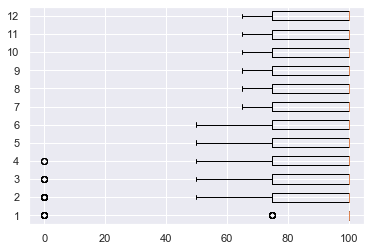

In [28]:
#Estos gráficos se deben mejorar, pero ayuda desde el análisis descriptivo a verificar outliers o valores que están por fuera de los bigotes.
plt.boxplot ([V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12], vert=False)
plt.show()

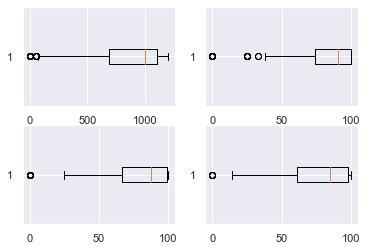

In [29]:
#Estos gráficos se deben mejorar, pero ayuda desde el análisis descriptivo a verificar outliers o valores que están por fuera de los bigotes.
fig, axs = plt.subplots(2, 2)

axs[0, 0].boxplot(Suma, vert=False)
axs[0, 1].boxplot(cvs, vert=False)
axs[1, 0].boxplot(cvc, vert=False)
axs[1, 1].boxplot(cvl, vert=False)

plt.show()

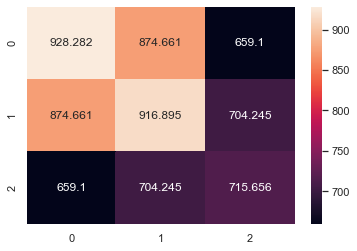

In [31]:
#Verificar desde el análisis descriptivo esto para que nos sirve.
M1 = np.array([cvs, cvc, cvl])
covMatrix1 = np.cov(M1,bias=True)
#print (covMatrix)
sns.heatmap(covMatrix1, annot=True, fmt='g')
plt.show()

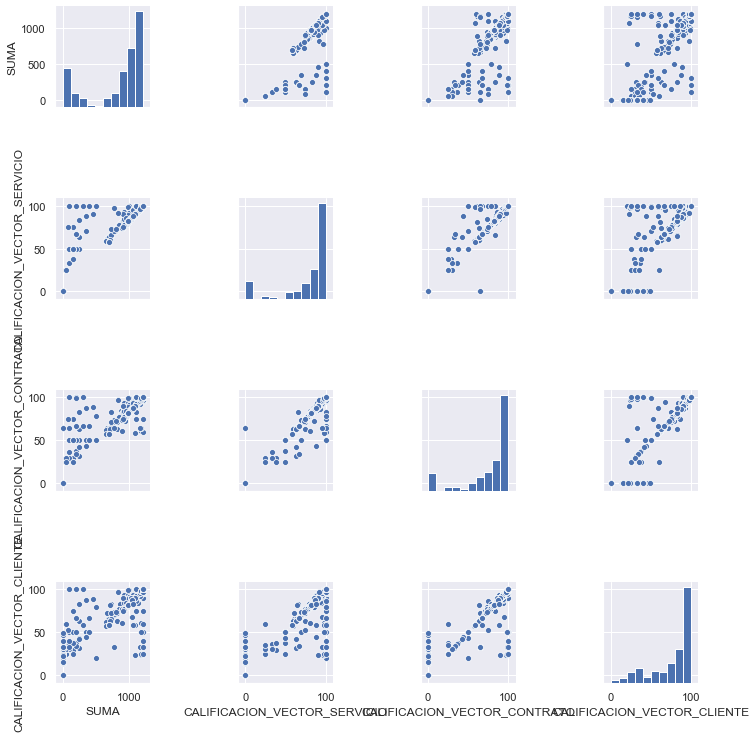

In [32]:
#Relación por pares de variables. Mirar en que podemos mejorar esta parte.
sns.pairplot(dfn1)
plt.show()

In [33]:
#left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.V1, df['V1'])]
#right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.V2, df['V2'])]
#klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df['V1'], df['V2'])]

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
#def newline(p1, p2, color='black'):
#    ax = plt.gca()
#    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
#    ax.add_line(l)
#    return l

#fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

# Vertical Lines
#ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
#ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
#ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
#ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
#for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
#    newline([1,p1], [3,p2])
#    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
#    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
#ax.text(1-0.05, 13000, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
#ax.text(3+0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
#ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size':22})
#ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita')
#ax.set_xticks([1,3])
#ax.set_xticklabels(["1952", "1957"])
#plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# Lighten borders
#plt.gca().spines["top"].set_alpha(.0)
#plt.gca().spines["bottom"].set_alpha(.0)
#plt.gca().spines["right"].set_alpha(.0)
#plt.gca().spines["left"].set_alpha(.0)
#plt.show()

### CANTIDAD Facturas

In [33]:
facturas = df["CANTIDAD"].dropna()
facturas = facturas.astype(str).astype(int)

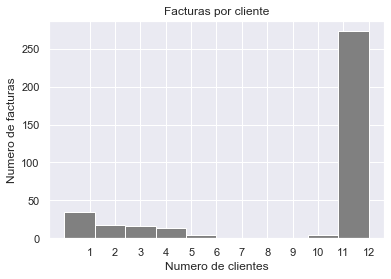

In [93]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]

plt.hist(facturas, color="gray")
plt.grid(axis='y', alpha=1)
plt.xlabel('Numero de clientes')
plt.ylabel('Numero de facturas')
plt.title('Facturas por cliente')
plt.xticks(x)
plt.show()

### CALIFICACION_VECTOR_SERVICIO

In [11]:
calificacion_servicio = df['CALIFICACION_VECTOR_SERVICIO']
calificacion_servicio = calificacion_servicio.astype(str).astype(int)

In [12]:
criteria = [calificacion_servicio.between(75, 100), calificacion_servicio.between(60, 74), calificacion_servicio.between(0, 59)]
values = ['Pago Oprtuno', 'Pago no Oportuno', 'No Pago']

df['Rangos_calificacion_servicio'] = np.select(criteria, values, 0)

calificacion_servicio = df['Rangos_calificacion_servicio'].value_counts()
calificacion_servicio = calificacion_servicio.to_frame()
calificacion_servicio = calificacion_servicio.sort_values(by = 'Rangos_calificacion_servicio', ascending=True)
calificacion_servicio.head()

,Rangos_calificacion_servicio
Pago no Oportuno,31
No Pago,61
Pago Oprtuno,274


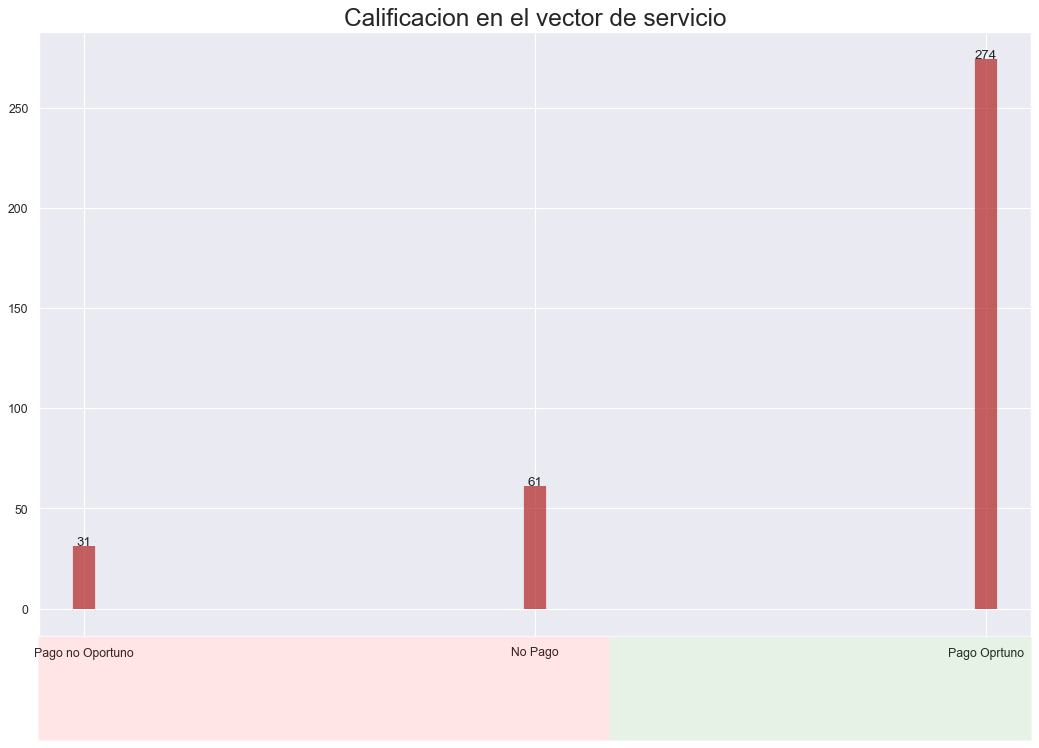

In [13]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=calificacion_servicio.index, ymin=0, ymax=calificacion_servicio.Rangos_calificacion_servicio, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, calificacion_servicio in enumerate(calificacion_servicio.Rangos_calificacion_servicio):
    ax.text(i, calificacion_servicio+0.5, round(calificacion_servicio, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Calificacion en el vector de servicio', fontdict={'size':22})
#ax.set(ylabel='Frecuencia', ylim=(0, 30))
#plt.xticks(vector_cualitativo.index, vector_cualitativo.index, rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

### CALIFICACION_VECTOR_CONTRATO

In [14]:
calificacion_contrato = df['CALIFICACION_VECTOR_CONTRATO']
calificacion_contrato = calificacion_contrato.astype(str).astype(int)

In [15]:
criteria = [calificacion_contrato.between(75, 100), calificacion_contrato.between(60, 74), calificacion_contrato.between(0, 59)]
values = ['Pago Oprtuno', 'Pago no Oportuno', 'No Pago']

df['Rangos_calificacion_contrato'] = np.select(criteria, values, 0)

calificacion_contrato = df['Rangos_calificacion_contrato'].value_counts()
calificacion_contrato = calificacion_contrato.to_frame()
calificacion_contrato = calificacion_contrato.sort_values(by = 'Rangos_calificacion_contrato', ascending=True)
calificacion_contrato.head()

,Rangos_calificacion_contrato
Pago no Oportuno,39
No Pago,67
Pago Oprtuno,260


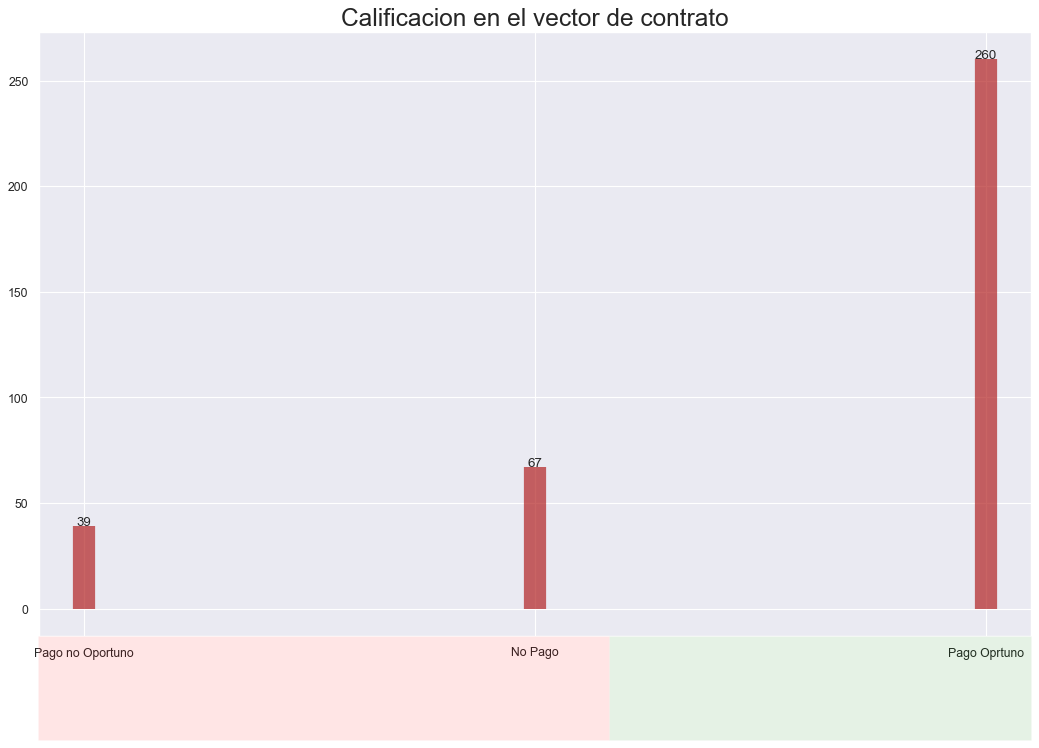

In [16]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=calificacion_contrato.index, ymin=0, ymax=calificacion_contrato.Rangos_calificacion_contrato, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, calificacion_contrato in enumerate(calificacion_contrato.Rangos_calificacion_contrato):
    ax.text(i, calificacion_contrato+0.5, round(calificacion_contrato, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Calificacion en el vector de contrato', fontdict={'size':22})
#ax.set(ylabel='Frecuencia', ylim=(0, 30))
#plt.xticks(vector_cualitativo.index, vector_cualitativo.index, rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

### CALIFICACION_VECTOR_CLIENTE

In [17]:
calificacion_cliente = df['CALIFICACION_VECTOR_CLIENTE']
calificacion_cliente = calificacion_cliente.astype(str).astype(int)

In [18]:
criteria = [calificacion_cliente.between(75, 100), calificacion_cliente.between(60, 74), calificacion_cliente.between(0, 59)]
values = ['Pago Oprtuno', 'Pago no Oportuno', 'No Pago']

df['Rangos_calificacion_cliente'] = np.select(criteria, values, 0)

calificacion_cliente = df['Rangos_calificacion_cliente'].value_counts()
calificacion_cliente = calificacion_cliente.to_frame()
calificacion_cliente = calificacion_cliente.sort_values(by = 'Rangos_calificacion_cliente', ascending=True)
calificacion_cliente.head()

,Rangos_calificacion_cliente
Pago no Oportuno,29
No Pago,87
Pago Oprtuno,250


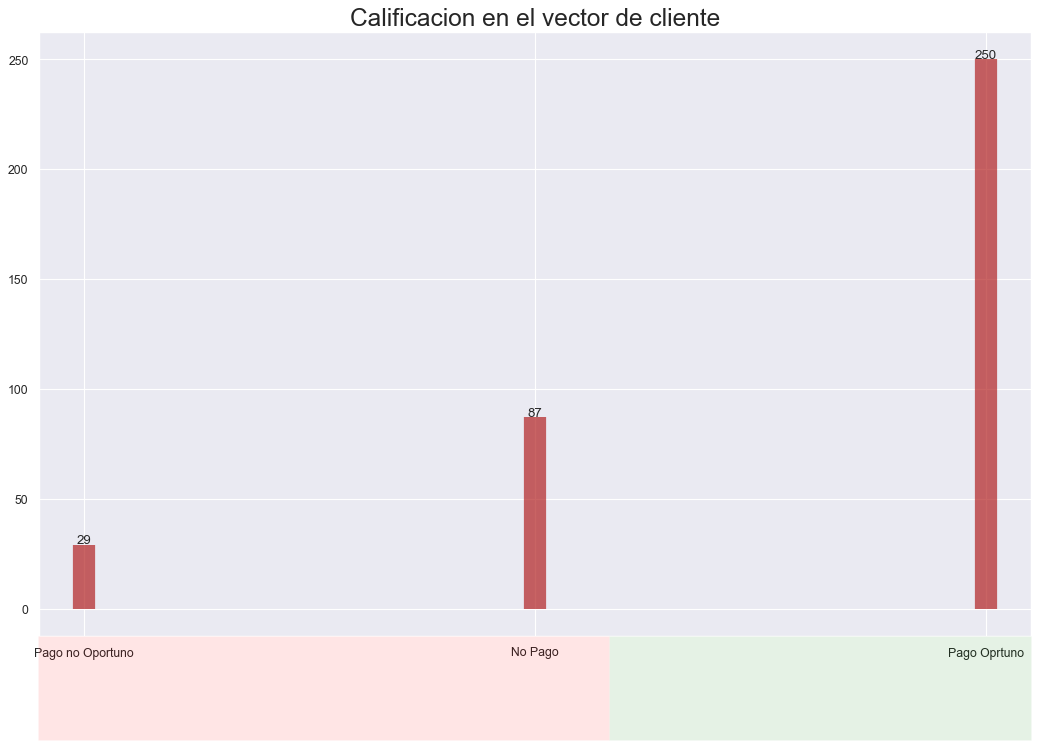

In [19]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=calificacion_cliente.index, ymin=0, ymax=calificacion_cliente.Rangos_calificacion_cliente, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, calificacion_cliente in enumerate(calificacion_cliente.Rangos_calificacion_cliente):
    ax.text(i, calificacion_cliente+0.5, round(calificacion_cliente, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Calificacion en el vector de cliente', fontdict={'size':22})
#ax.set(ylabel='Frecuencia', ylim=(0, 30))
#plt.xticks(vector_cualitativo.index, vector_cualitativo.index, rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

### VECTOR_CUALITATIVO_CONTRATO

In [20]:
vector_cualitativo = df['VECTOR_CUALITATIVO_CONTRATO'].value_counts()
vector_cualitativo = vector_cualitativo.to_frame()
vector_cualitativo.head()

,VECTOR_CUALITATIVO_CONTRATO
EXCELENTE,179
BUENO,71
REGULAR,64
MALO,52


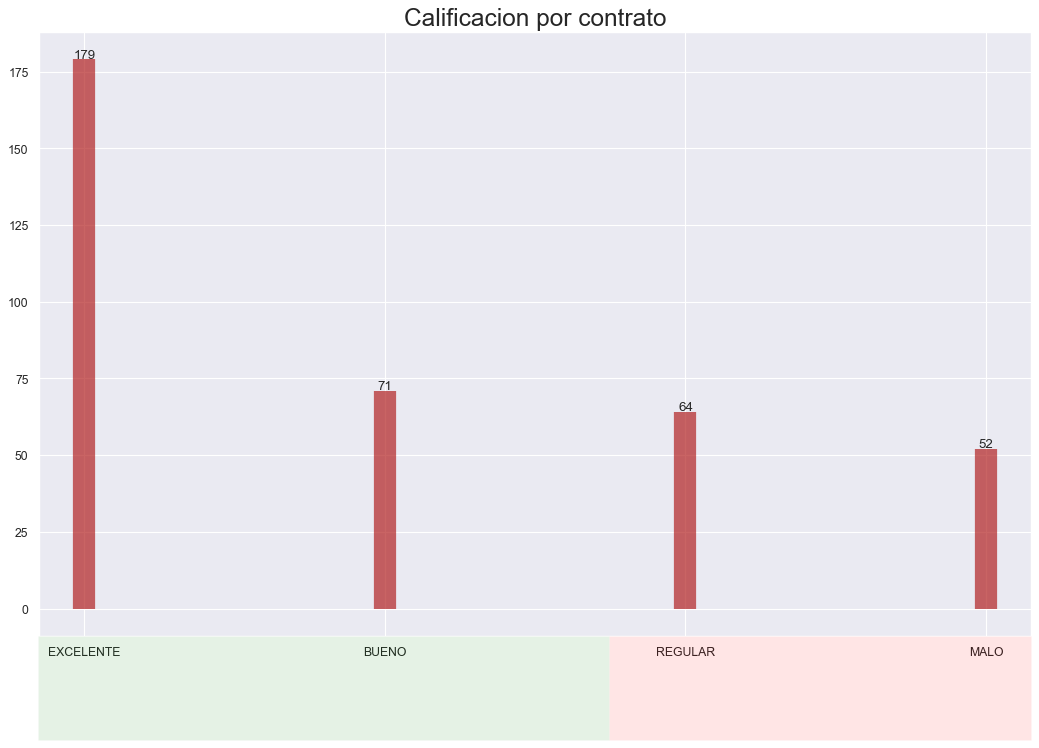

In [21]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=vector_cualitativo.index, ymin=0, ymax=vector_cualitativo.VECTOR_CUALITATIVO_CONTRATO, color='firebrick', alpha=0.7, linewidth=20)


# Annotate Text
for i, VECTOR_CUALITATIVO_CONTRATO in enumerate(vector_cualitativo.VECTOR_CUALITATIVO_CONTRATO):
    ax.text(i, VECTOR_CUALITATIVO_CONTRATO+0.5, round(VECTOR_CUALITATIVO_CONTRATO, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Calificacion por contrato', fontdict={'size':22})
#ax.set(ylabel='Frecuencia', ylim=(0, 30))
#plt.xticks(vector_cualitativo.index, vector_cualitativo.index, rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

### Banco 1

In [22]:
banco1 = df['BANCO_1'].value_counts()
banco1 = banco1.to_frame()
banco1.head()

,BANCO_1
GANA EN LINEA,80
BANCOLOMBIA,50
PSE - Botón de Pagos,27
UNE - BANCOLOMBIA,23
UNE - GANA EN LINEA,23


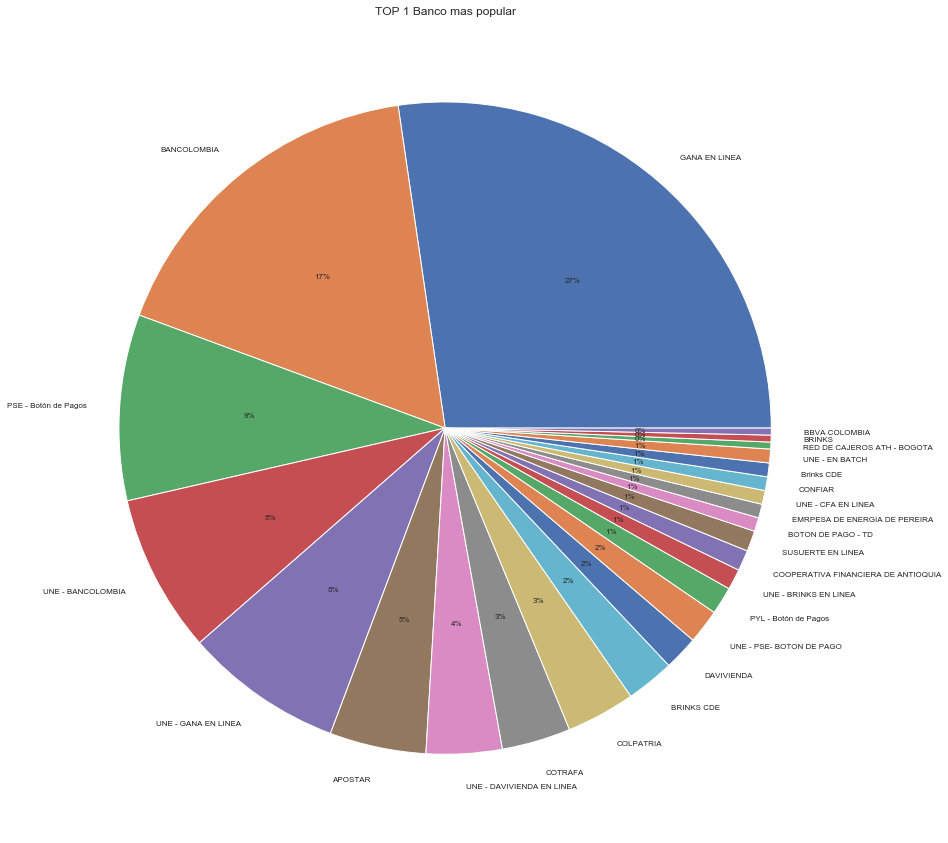

In [23]:
plot = banco1.plot.pie(y='BANCO_1', figsize=(15, 15), autopct='%1.0f%%', legend = None, fontsize = (8))
plt.title("TOP 1 Banco mas popular")
plt.ylabel("")
plt.show()

### Banco 2

In [24]:
banco2 = df['BANCO_2'].value_counts()
banco2 = banco2.to_frame()
banco2.head()

,BANCO_2
BANCOLOMBIA,41
GANA EN LINEA,31
UNE - EN BATCH,21
COLPATRIA,18
UNE - BANCOLOMBIA,16


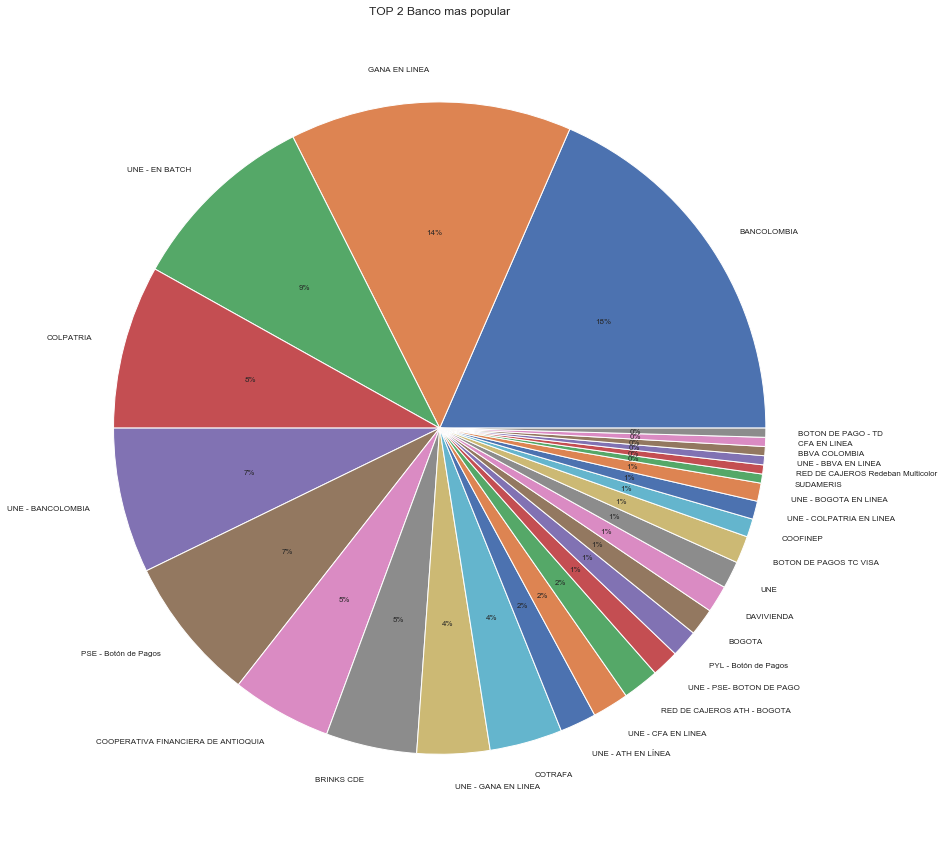

In [25]:
plot = banco2.plot.pie(y='BANCO_2', figsize=(15, 15), autopct='%1.0f%%', legend = None, fontsize = (8))
plt.title("TOP 2 Banco mas popular")
plt.ylabel("")
plt.show()

### Dia 1 mas utilizado para hacer pagos

In [26]:
dia1 = df["DIA_PAGO_1"].dropna()
dia1 = dia1.astype(str).astype(int)

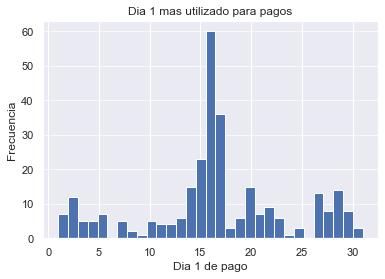

In [27]:
plt.hist(dia1, bins=31)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Dia 1 de pago')
plt.ylabel('Frecuencia')
plt.title('Dia 1 mas utilizado para pagos')
plt.show()

### Dia 2 mas utilizado para hacer pagos

In [28]:
dia2 = df["DIA_PAGO_2"].dropna()
dia2 = dia2.astype(str).astype(int)

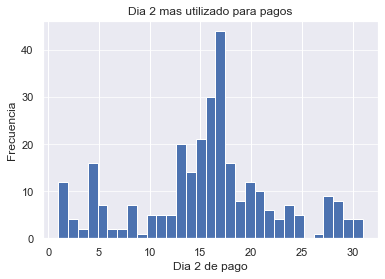

In [29]:
plt.hist(dia2, bins=31)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Dia 2 de pago')
plt.ylabel('Frecuencia')
plt.title('Dia 2 mas utilizado para pagos')
plt.show()

### Dia 3 mas utilizado para hacer pagos

In [30]:
dia3 = df["DIA_PAGO_3"].dropna()
dia3 = dia3.astype(str).astype(int)

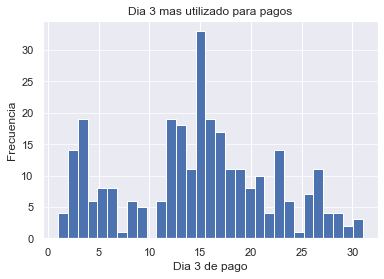

In [31]:
plt.hist(dia3, bins=31)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Dia 3 de pago')
plt.ylabel('Frecuencia')
plt.title('Dia 3 mas utilizado para pagos')
plt.show()

### REGION

In [74]:
regional = df["REGIONAL"].value_counts()
regional = regional.to_frame()
regional.head()

,REGIONAL
NOROCCIDENTE,268
EJE CAFETERO,90
SUR,8


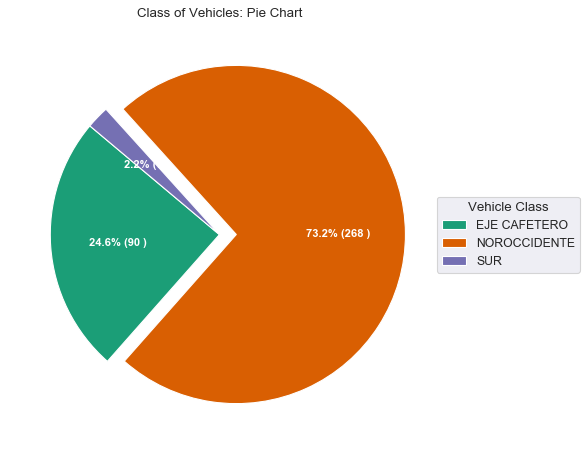

In [83]:
regional = df.groupby('REGIONAL').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = regional['counts']
categories = regional['REGIONAL']
explode = [0,0.1,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Vehicle Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Class of Vehicles: Pie Chart")
plt.show()